<img src='img1.png'></img>

<b>Data visualization</b> is the graphical representation of data in order to interactively and efficiently convey insights to clients, customers, and stakeholders in general. It is a way to summarize your findings and display it in a form that facilitates interpretation and can help in identifying patterns or trends.

Also since a picture is worth a thousand words, then plots and graphs can
be very effective in conveying a clear description of the data especially when
disclosing findings to an audience or sharing the data with other peer data
scientists. Also, they can be very valuable when it comes to supporting any
recommendations you make to clients managers or other decision-makers in
your field. 

Python offers multiple great graphing libraries that come packed with lots of different features. No matter if you want to create interactive, live or highly customized plots python has an excellent library for you.<br>

There are few popular plotting libraries:<br>

1.<b>Matplotlib: </b>low level, provides lots of freedom<br>
2.<b>Pandas Visualization:</b> easy to use interface, built on Matplotlib<br>
3.<b>Seaborn:</b> high-level interface, great default styles<br>
4.<b>ggplot: </b>based on R’s ggplot2, uses Grammar of Graphics<br>
5.<b>Plotly:</b> can create interactive plots<br>

Here, we are going to get hands-on experience with visual exploration of data using pandas, matplotlib and seaborn.

In [1]:
import pandas as pd
import numpy as np

#if you don't want to see warnings in notebook
import warnings
warnings.filterwarnings('ignore')

#Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

print("Libraries imported")

Libraries imported


In [2]:
data=pd.read_csv('telecom churn dataset.csv')

In [3]:
data.head()

State  Account length  Area code International plan Voice mail plan  \
0    KS             128        415                 No             Yes   
1    OH             107        415                 No             Yes   
2    NJ             137        415                 No              No   
3    OH              84        408                Yes              No   
4    OK              75        415                Yes              No   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5              103             16.62   
2             41.38              121.2              110             10.30   
3             50.90               61.9               88              5.26   
4             28.34              148.3              122             12.61   

   Total night minutes  Total night calls  Total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   Total intl minutes  Total intl calls  Total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   Customer service calls  Churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False

# Univariate Visualization 
Univariate analysis looks at one feature at a time. When we analyze a feature independently, we are usually mostly interested in the distribution of its values and ignore other features in the dataset.

<i><b>First we will see how to plot numerical features only

### Histograms

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F66FA9B048>,
      dtype=object)

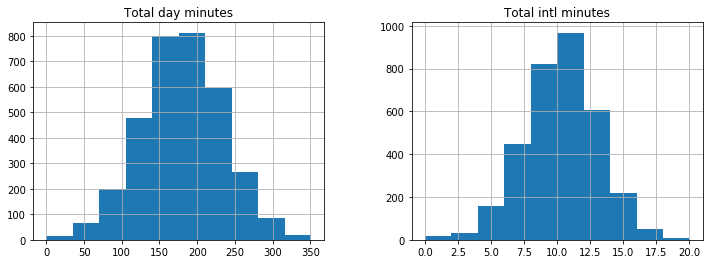

In [4]:
features=['Total day minutes','Total intl minutes']
data[features].hist(figsize=(12,4))

A histogram groups values into bins of equal value range. The shape of the histogram may contain clues about the underlying distribution type: Gaussian, exponential, etc. You can also spot any skewness in its shape when the distribution is nearly regular but has some anomalies. Knowing the distribution of the feature values becomes important when you use Machine Learning methods that assume a particular type (most often Gaussian).

In the above plot, we see that the variable Total day minutes and Total intl mintues both are normally distributed.

Text(0.5, 1.0, 'Total international calls')

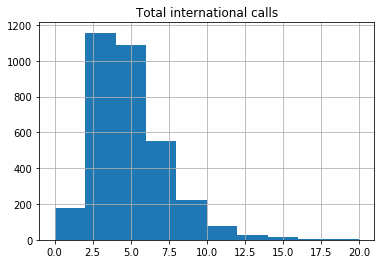

In [5]:
data['Total intl calls'].hist()
plt.title("Total international calls")

On the other hand, Total intl calls is prominently skewed right (its tail is longer on the right).

### Density plots
This is another method to grasp the visualization. It can be created with both pandas and seaborn library.

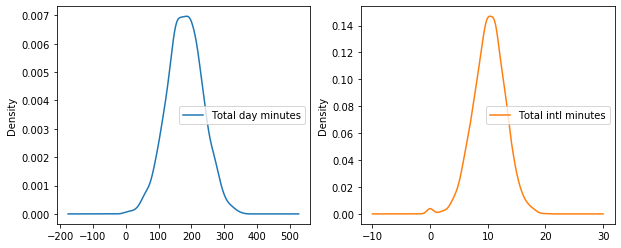

In [6]:
data[features].plot(kind='density', subplots=True, layout=(1, 2), 
                  sharex=False, figsize=(10, 4));

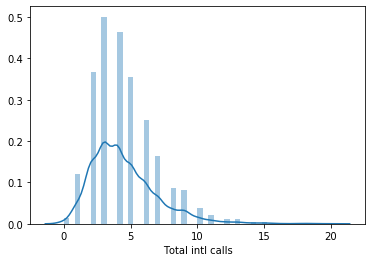

In [7]:
sns.distplot(data['Total intl calls'])

Here by default it displays both historgram and kernel density estimate(kde) on top.

### Box Plot 
Box Plot is the visual representation of the depicting groups of numerical data through their quartiles. It is also used for detecting the outlier in data set.

It can be created with both pandas and seaborn library.

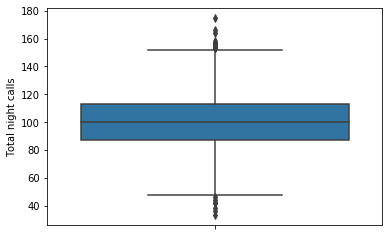

In [8]:
sns.boxplot(y='Total night calls', data=data)

Let’s take the box plot i.e, blue box plot of the figure and understand these statistical things:
1. Bottom black horizontal line of blue box plot is minimum value
2. First black horizontal line of rectangle shape of blue box plot is First quartile or 25%
3. Second black horizontal line of rectangle shape of blue box plot is Second quartile or 50% or median.
4. Third black horizontal line of rectangle shape of blue box plot is third quartile or 75%
5. Top black horizontal line of rectangle shape of blue box plot is maximum value.
6. Small diamond shape of blue box plot is outlier data or erroneous data.

### Violin plot
Violin Plot is a method to visualize the distribution of numerical data of different variables. It is similar to Box Plot but with a rotated plot on each side, giving more information about the density estimate on the y-axis.

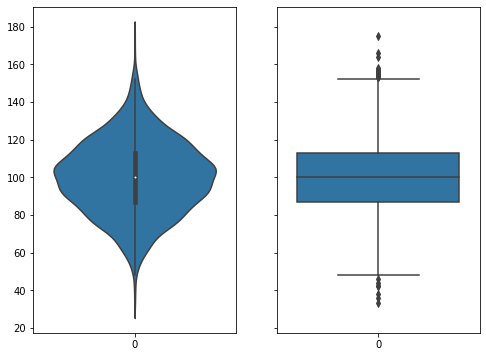

In [9]:
fig, axes=plt.subplots(1,2,sharey=True,figsize=(8,6))
sns.violinplot(data=data['Total night calls'],ax=axes[0])
sns.boxplot(data=data['Total night calls'],ax=axes[1])

In violin plots, the outer part or the violin like structure is basically the distribution of column and the inner part is the actual box plot. It is more helpful in visualizing different numerical values with categorical values. (basically in multivariate distribution)

The difference between the box and violin plots is that the former illustrates certain statistics concerning individual examples in a dataset while the violin plot concentrates more on the smoothed distribution as a whole.

While numerical statistics can be displayed by <b><i>describe()</i></b> as below:

In [10]:
data[features].describe()

Total day minutes  Total intl minutes
count        3333.000000         3333.000000
mean          179.775098           10.237294
std            54.467389            2.791840
min             0.000000            0.000000
25%           143.700000            8.500000
50%           179.400000           10.300000
75%           216.400000           12.100000
max           350.800000           20.000000

<i><b> Now lets look at categorical and binary features

We can check the frequency distribution using pandas <b><i>value_counts()</i></b> method then we will visualize it using categorical plots.

In [11]:
data['Churn'].value_counts()

False    2850
True      483
Name: Churn, dtype: int64

In [12]:
#To get the percentage
data['Churn'].value_counts(normalize=True)

False    0.855086
True     0.144914
Name: Churn, dtype: float64

### Count Plot
Count plot shows the counts of observations in each categorical bin using bars.

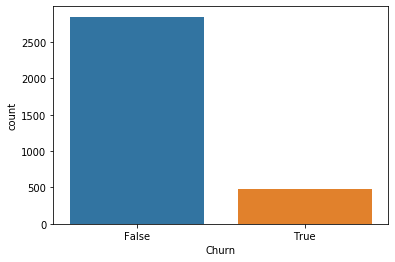

In [13]:
sns.countplot(x='Churn',data=data)

This chart above vividly illustrates the imbalance in our target variable. Thus this is an imbalanced dataset.

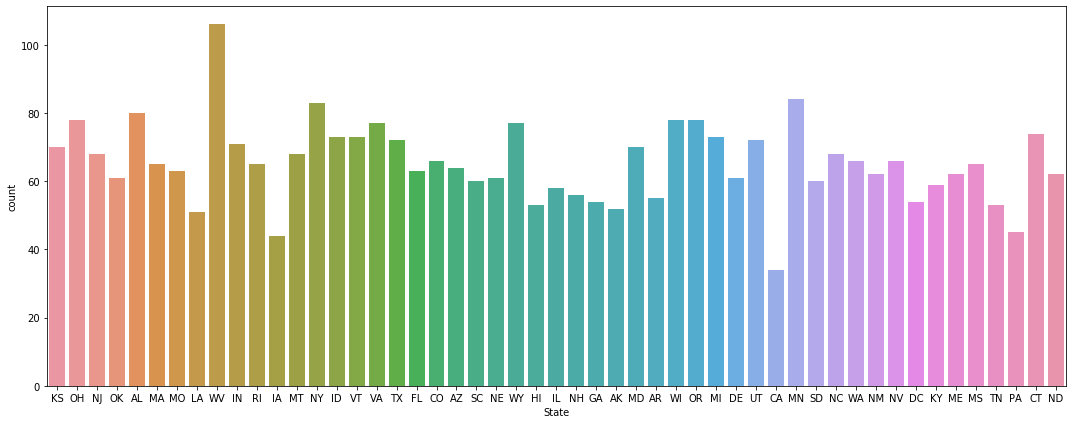

In [14]:
plt.figure(figsize=(15,6))
sns.countplot(x='State',data=data)
plt.tight_layout()

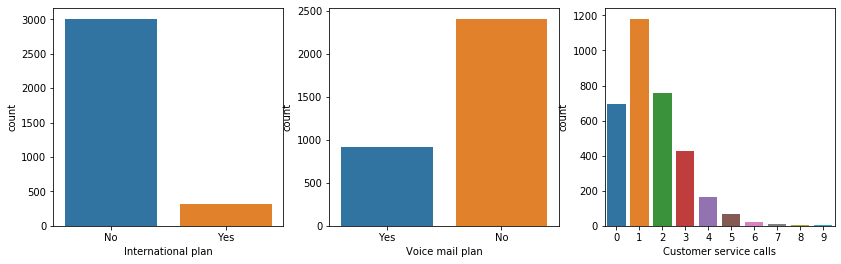

In [15]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(14, 4))

sns.countplot(x='International plan', data=data, ax=axes[0]);
sns.countplot(x='Voice mail plan', data=data, ax=axes[1])
sns.countplot(x='Customer service calls', data=data, ax=axes[2]);

We can see in above plots that features <i>'International plan'</i> and <i>'Voice mail plan'</i> plays major role in churn predicition. Also the count plot for <i>'Customer service calls'</i> on the right gives a hint that the majority of customers resolve their problems in maximum 2-3 calls. But, as we want to be able to predict the minority class, we may be more interested in how the fewer dissatisfied customers behave. It may well be that the tail of that bar plot contains most of our churn.

### Bar Plot
Barplot is a general plot that allows you to aggregate the categorical data based off some function, by default the mean:

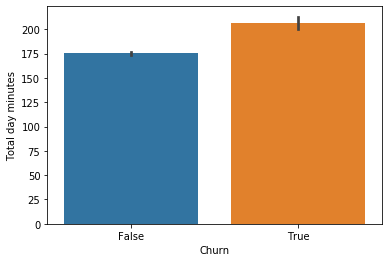

In [16]:
sns.barplot(x='Churn',y='Total day minutes',data=data)

While the histograms, discussed above, and bar plots may look similar, there are several differences between them:

1. Histograms are best suited for looking at the distribution of numerical variables while bar plots are used for categorical features.
2. The values on the X-axis in the histogram are numerical; a bar plot can have any type of values on the X-axis: numbers, strings, booleans.
3. The histogram's X-axis is a Cartesian coordinate axis along which values cannot be changed; the ordering of the bars is not predefined. Still, it is useful to note that the bars are often sorted by height, that is, the frequency of the values. Also, when we consider ordinal variables (like Customer service calls in our data), the bars are usually ordered by variable value.

# Multivariate visualization
Multivariate plots allow us to see relationships between two and more different variables, all in one figure. Just as in the case of univariate plots, the specific type of visualization will depend on the types of the variables being analyzed.

<i> <b> First we will see visualization between Numerical variables

### Matrix plot
Let's look at the correlations among the numerical variables in our dataset. This information is important to know as there are Machine Learning algorithms (for example, linear and logistic regression) that do not handle highly correlated input variables well.

First, we will use the method <i><b>corr()</b></i> on a DataFrame that calculates the correlation between each pair of features. Then, we pass the resulting correlation matrix to <i><b>heatmap()</b></i> from seaborn, which renders a color-coded matrix for the provided values:

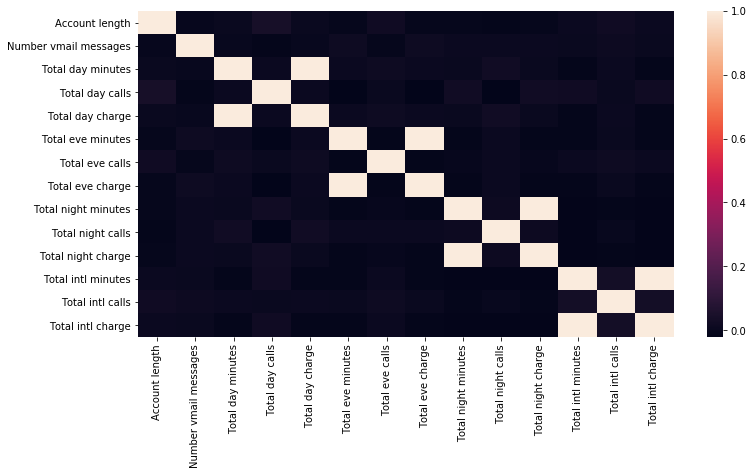

In [17]:
# Drop non-numerical variables
corr_data=data.drop(['State', 'International plan', 'Voice mail plan', 
                      'Area code', 'Churn', 'Customer service calls'],axis=1)

# Calculate and plot
plt.figure(figsize=(12,6))
sns.heatmap(corr_data.corr())

### Scatter Plot
The scatter plot displays values of two numerical variables as Cartesian coordinates in 2D space. Scatter plots in 3D are also possible.

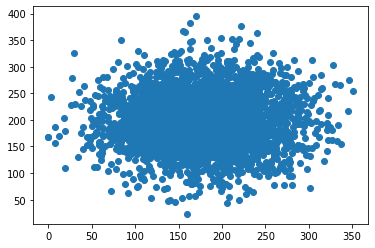

In [18]:
plt.scatter(data['Total day minutes'], data['Total night minutes']);

We get an uninteresting picture of two normally distributed variables. Also, it seems that these features are uncorrelated because the ellipse-like shape is aligned with the axes.

There is a slightly fancier option to create a scatter plot with the `seaborn` library:

### Joint Plot
`jointplot()` allows you to basically match up two distplots for bivariate data. With your choice of what <b>kind</b> parameter to compare with:

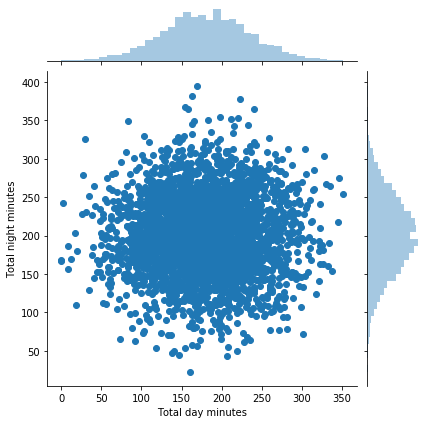

In [19]:
sns.jointplot(x='Total day minutes', y='Total night minutes', 
              data=data, kind='scatter');

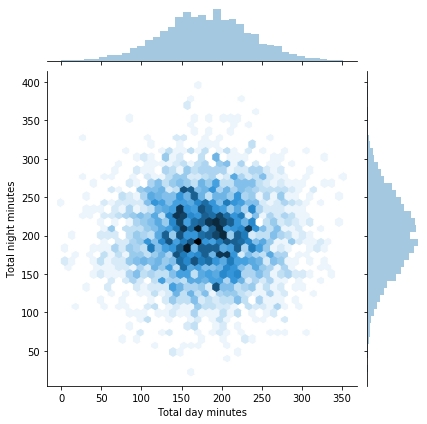

In [20]:
sns.jointplot(x='Total day minutes', y='Total night minutes', 
              data=data, kind='hex');

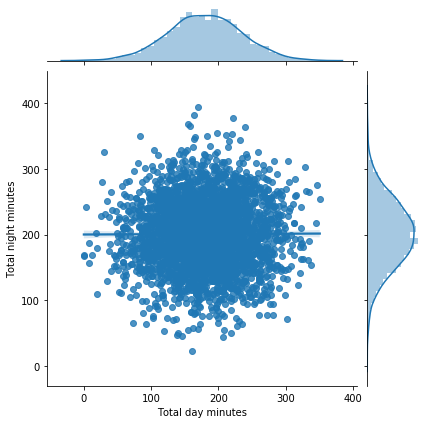

In [21]:
sns.jointplot(x='Total day minutes', y='Total night minutes', 
              data=data, kind='reg');

The function `jointplot()` plots two histograms that may be useful in some cases.

### Pairplot
Pairplot will plot pairwise relationships across an entire dataframe (for the numerical columns) and supports a color `hue` argument (for categorical columns).

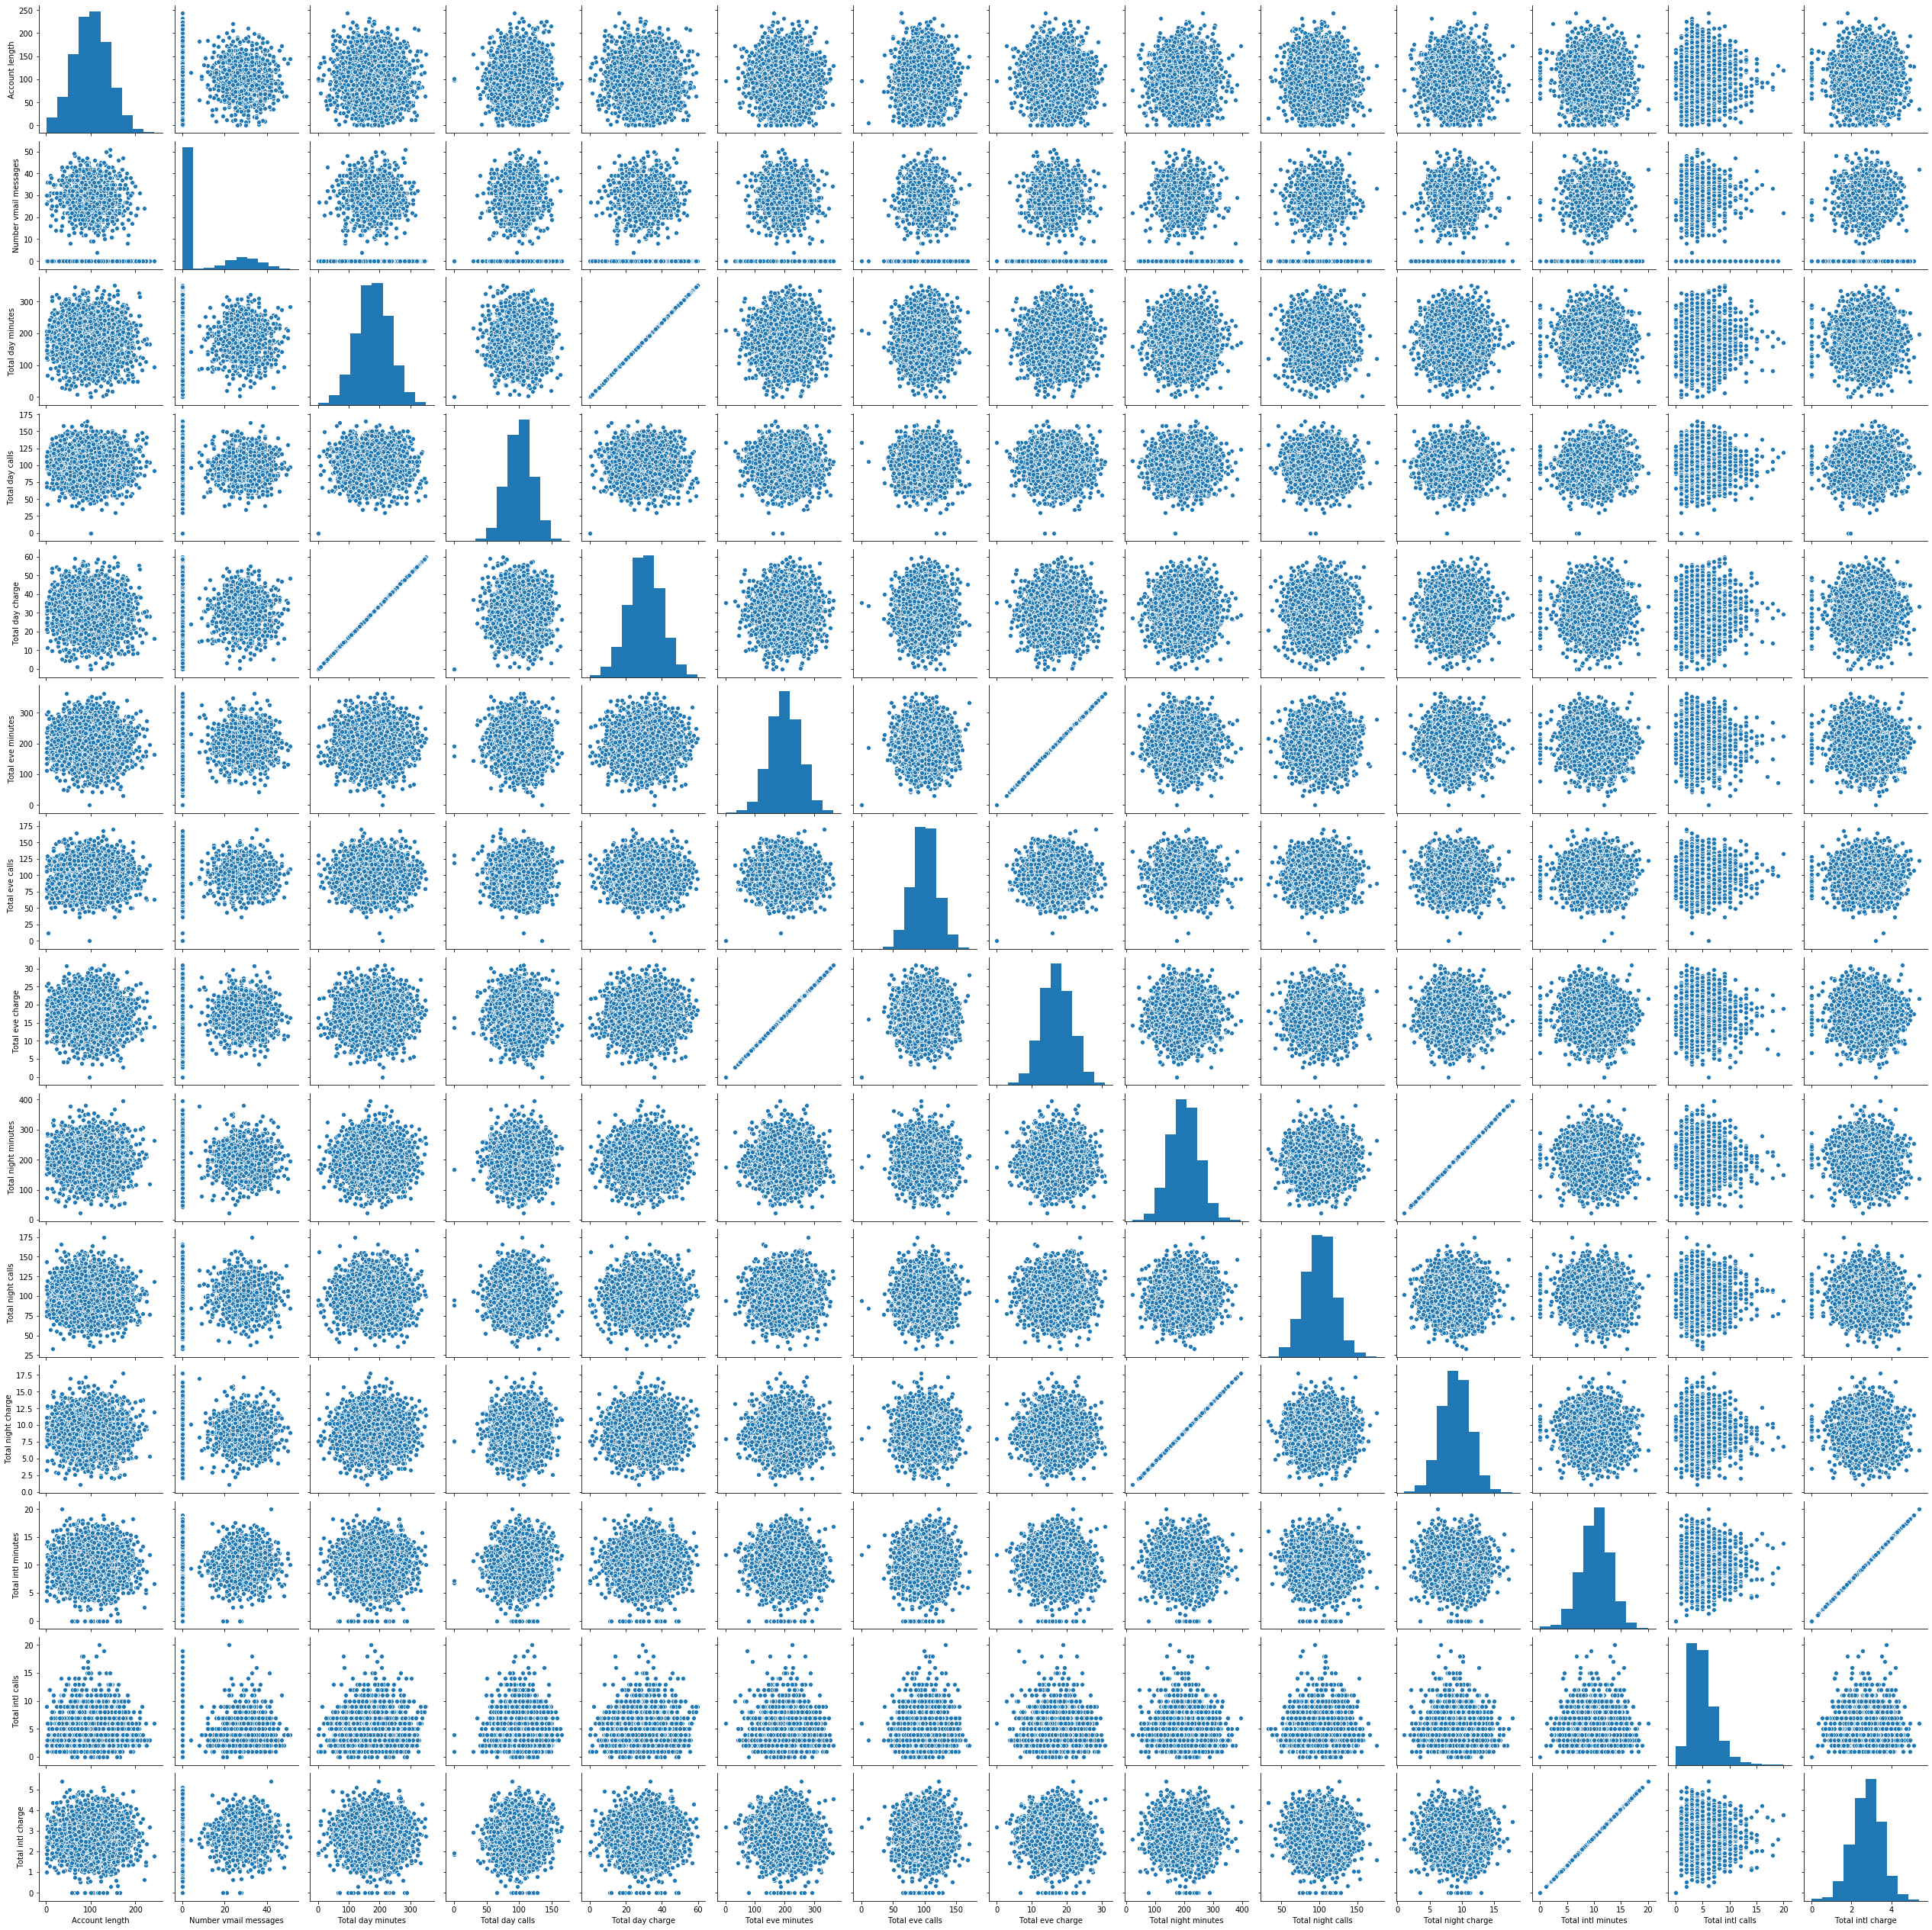

In [22]:
# Drop non-numerical variables
pair_data=data.drop(['State', 'International plan', 'Voice mail plan', 
                      'Area code', 'Churn', 'Customer service calls'],axis=1)
#Plot 
sns.pairplot(pair_data)

This can also be refered as scatterplot matrix. Its diagonal contains the distributions of the corresponding variables, and the scatter plots for each pair of variables fill the rest of the matrix.

<b><i>Now we will see visualization between Numerical variables vs Categorical variables

Let's try to gain new insights for churn prediction from the interactions between the numerical and categorical features.

More specifically, let's see how the input variables are related to the target variable Churn.

We can see the trends between two numerical feature based on the binary featureor categorical feature. We can achieve this with the `scatter()` function seen above, but, let's try a new function called `lmplot()` and use the parameter `hue` to indicate our categorical feature of interest

### Regression plot

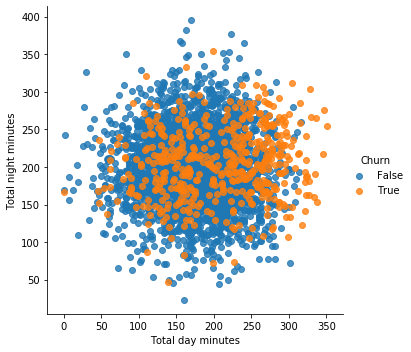

In [23]:
sns.lmplot(x='Total day minutes',y='Total night minutes',data=data,hue='Churn',fit_reg=False)

We can add more variable separation through columns and rows with the use of a grid. Just indicate this with the col or row arguments

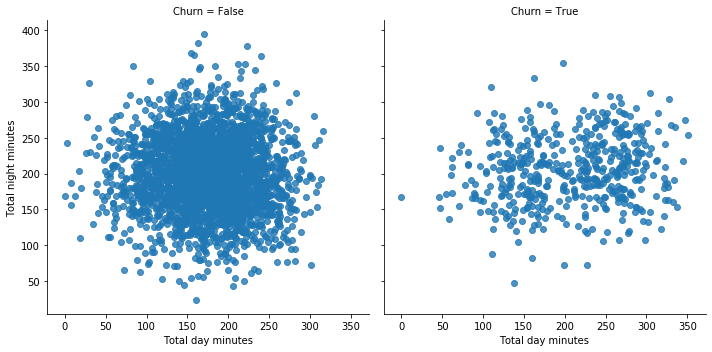

In [24]:
sns.lmplot(x='Total day minutes',y='Total night minutes',data=data,col='Churn',fit_reg=False)

It seems that our small proportion of disloyal customers which means who have churned, lean towards the top-right corner; that is, such customers tend to spend more time on the phone during both day and night. But this is not absolutely clear, and we won't make any definitive conclusions from this chart.

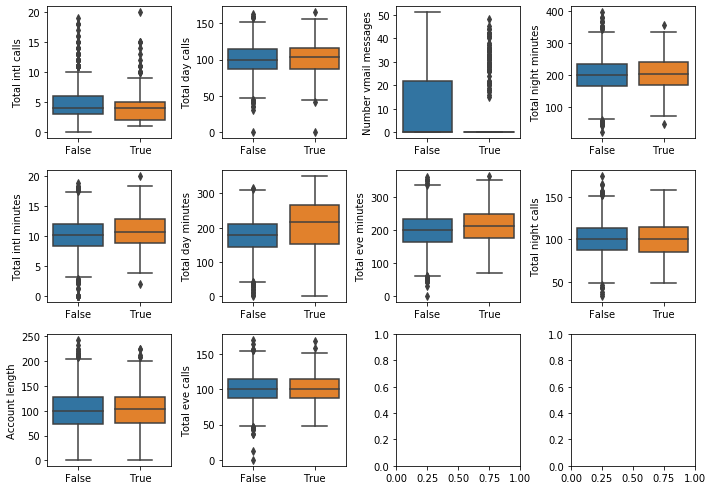

In [25]:
numerical_data = list(set(data.columns) - 
                 set(['State', 'International plan', 'Voice mail plan', 
                      'Area code', 'Churn', 'Customer service calls','Total day charge', 
                      'Total eve charge', 'Total night charge', 'Total intl charge']))

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(10, 7))
for idx, feat in enumerate(numerical_data):
    ax=axes[int(idx / 4), idx % 4]
    sns.boxplot(x='Churn',y=feat,data=data,ax=ax)
    ax.set_xlabel('')
    ax.set_ylabel(feat)
fig.tight_layout()

Now everything is clear from the box plots that disloyal customers tend to talk on the phone more.

An interesting observation: on average, customers that discontinue their contracts are more active users of communication services. Perhaps they are unhappy with the tariffs, so a possible measure to prevent churn could be a reduction in call rates. The company will need to undertake additional economic analysis to find out whether such measures would be beneficial.

<b><i>Now lets see plots with both as a categorical feature i.e., Categorical vs. Categorical

As we saw earlier in this article, the variable Customer service calls has few unique values and, thus, can be considered either numerical or ordinal. We have already seen its distribution with a <i><b>count plot</b></i>. Now, we are interested in the relationship between this ordinal feature and the target variable Churn.

Let's look at the distribution of the number of calls to customer service, again using a count plot. This time, let's also pass the parameter `hue=Churn` that adds a categorical dimension to the plot:

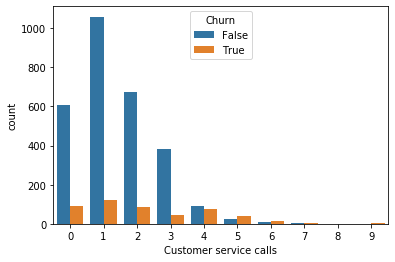

In [26]:
sns.countplot(x='Customer service calls', hue='Churn', data=data);

<b>Observation:</b> the churn rate increases significantly after 4 or more calls to customer service.

Now, let's look at the relationship between Churn and the binary features, International plan and Voice mail plan.

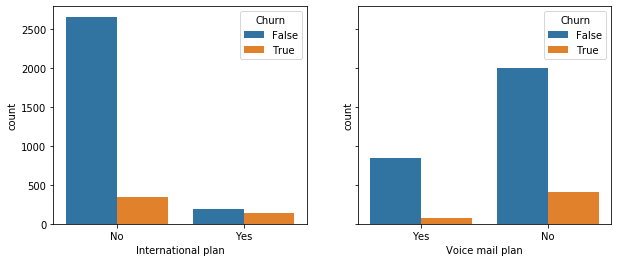

In [27]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(10, 4))

sns.countplot(x='International plan', hue='Churn', data=data, ax=axes[0]);
sns.countplot(x='Voice mail plan', hue='Churn', data=data, ax=axes[1]);

<b>Observation: </b>when International Plan is enabled, the churn rate is much higher; the usage of the international plan by the customer is a strong feature. We do not observe the same effect with Voice mail plan.

In addition to using graphical means for categorical analysis, there is a traditional tool from statistics: a contingency table, also called a <i><b>cross tabulation</b></i>. It shows a multivariate frequency distribution of categorical variables in tabular form. In particular, it allows us to see the distribution of one variable conditional on the other by looking along a column or row.

Let's try to see how `Churn` is related to the categorical variable `State` by creating a cross tabulation:

In [28]:
pd.crosstab(data['State'], data['Churn']).T

State  AK  AL  AR  AZ  CA  CO  CT  DC  DE  FL  ...  SD  TN  TX  UT  VA  VT  \
Churn                                          ...                           
False  49  72  44  60  25  57  62  49  52  55  ...  52  48  54  62  72  65   
True    3   8  11   4   9   9  12   5   9   8  ...   8   5  18  10   5   8   

State  WA  WI  WV  WY  
Churn                  
False  52  71  96  68  
True   14   7  10   9  

[2 rows x 51 columns]

Graphical representation of above table using box plot

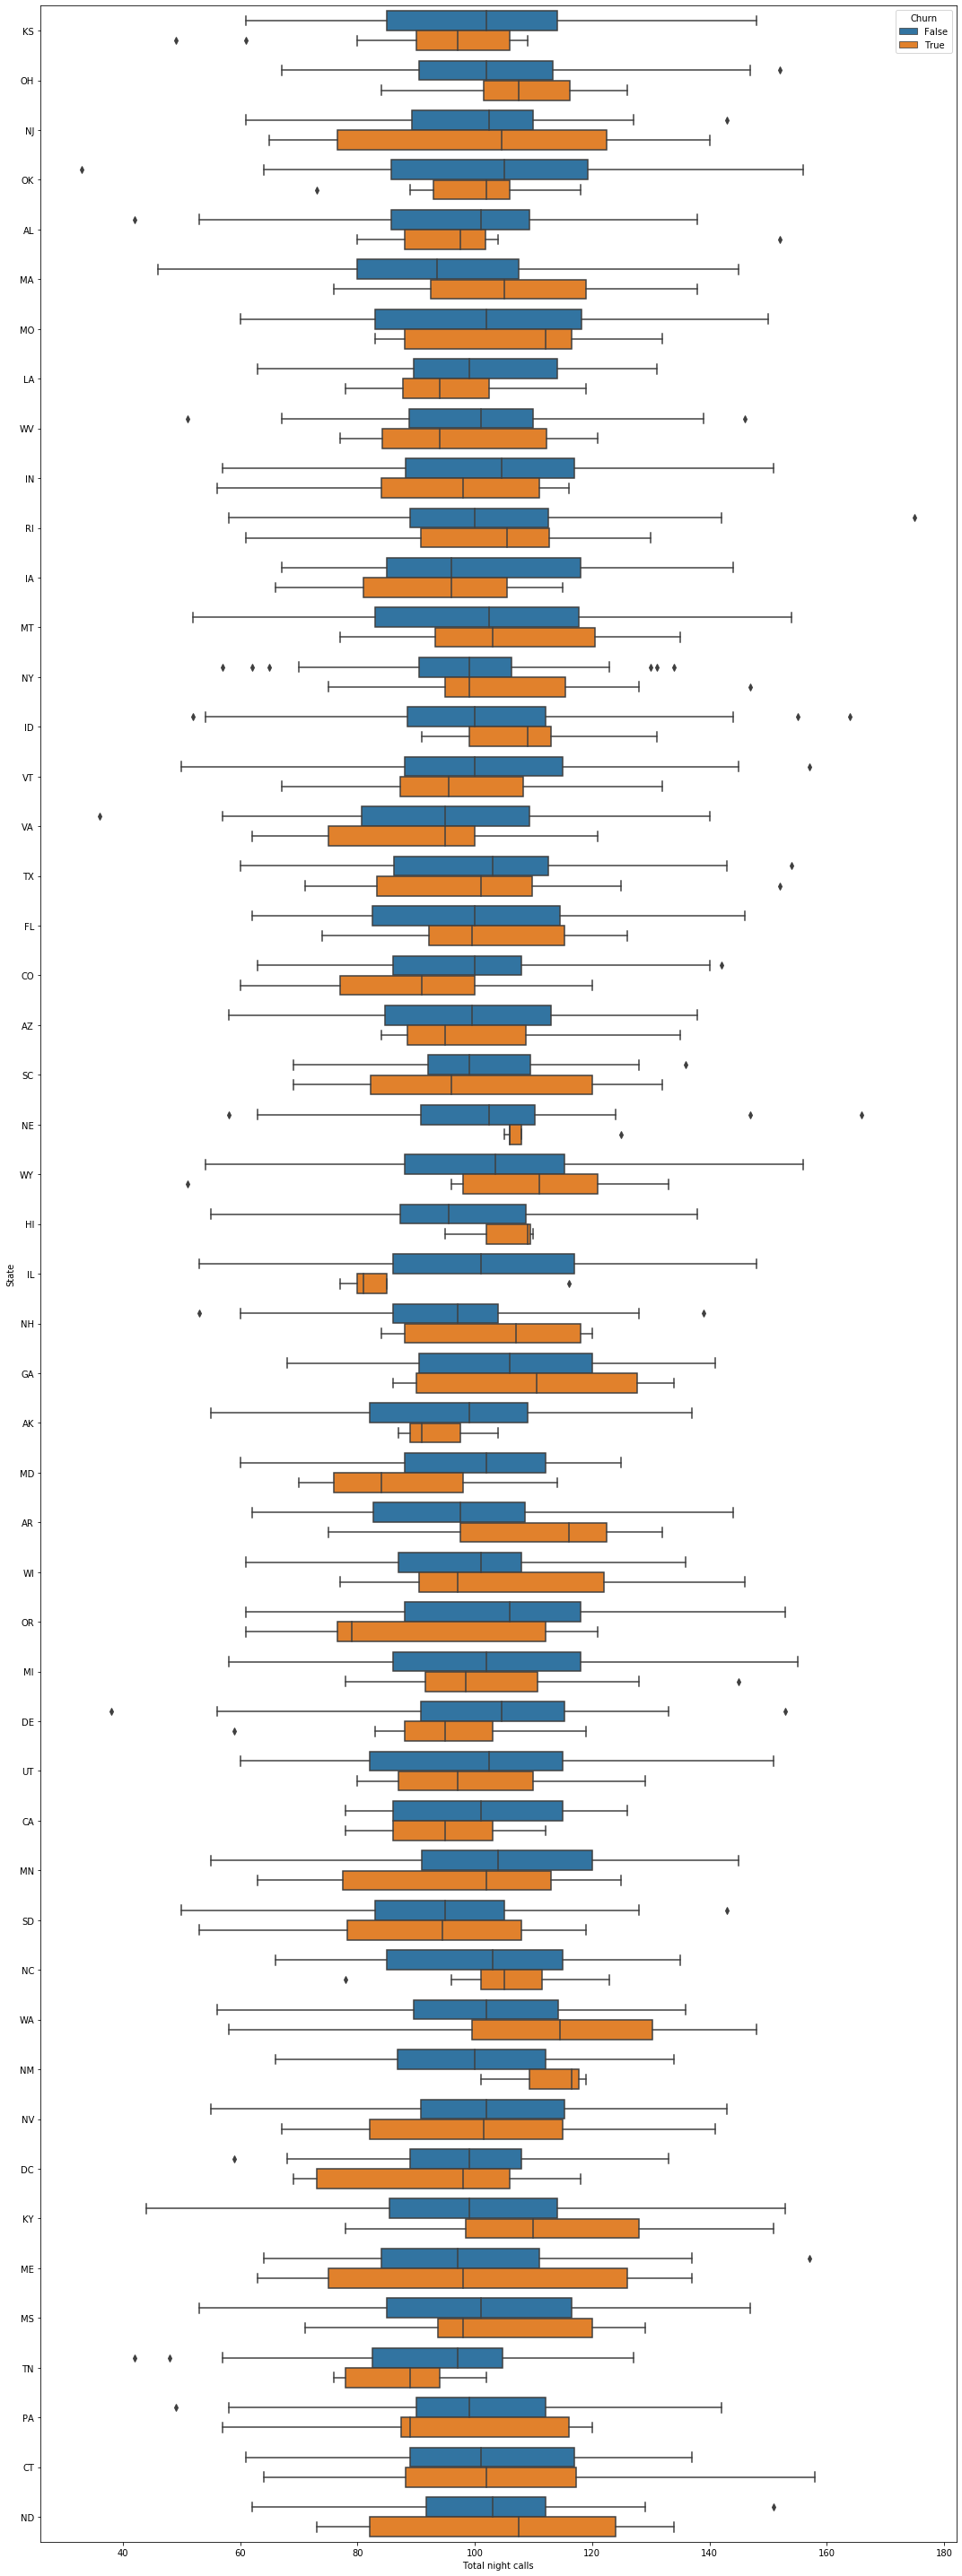

In [29]:
plt.figure(figsize=(15,40))
sns.boxplot(y=data['State'],x=data['Total night calls'],hue=data['Churn'])
plt.tight_layout()

<b>Conclusion</b> : We have looked at different facets of our dataset by guessing interesting features and selecting a small number of them at a time for visualization. We have dealt with two to three variables at once and were easily able to observe the structure and relationships in data. We could use `hist()` or create a scatterplot matrix with `pairplot()` for the whole dataset to look at all of our features simultaneously. But, when the number of features is high enough, this kind of visual analysis quickly becomes slow and inefficient. Then comes <b>Dimensionality reduction</b> and <b>t-SNE</b> into picture which are able to visualize high number of features in dataset.